<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Разработка-модели-машинного-обучения" data-toc-modified-id="Разработка-модели-машинного-обучения-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Разработка модели машинного обучения</a></span><ul class="toc-item"><li><span><a href="#Обучение-нейронной-сетью" data-toc-modified-id="Обучение-нейронной-сетью-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Обучение нейронной сетью</a></span></li><li><span><a href="#Cлучайный-лес" data-toc-modified-id="Cлучайный-лес-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Cлучайный лес</a></span></li><li><span><a href="#Метод-K-ближайших-соседей" data-toc-modified-id="Метод-K-ближайших-соседей-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Метод K-ближайших соседей</a></span></li></ul></li><li><span><a href="#Сохранение-модели" data-toc-modified-id="Сохранение-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Сохранение модели</a></span></li></ul></div>

# Предсказание размеров шва при электронно-лучевой сварке

В качестве исходных данных были взяты результаты экспериментальных исследований, проводимых в целях улучшения технологического процесса электронно-лучевой сварки изделия, сборка которого состоит из элементов, состоящих из разнородного материала. Установка электронно-лучевой сварки, на которой проводились исследования, предназначена для сварки электронным лучом в глубоком вакууме деталей сборочных единиц из нержавеющих сталей, титановых, алюминиевых и специальных сплавов. Существующая установка электронно-лучевой сварки обеспечивает повторяемость режимов в рамках возможностей реализованной системы управления. Работы по сварке выполнялись на образцах-имитаторах, соответствующих технологическому изделию. 

Для уменьшения вложения энергии при сварке:
1.	Снижалась величина сварочного тока (IW);<br>
2.	Увеличивался ток фокусировки электронного пучка (IF);<br>
3.	Увеличивалась скорость сварки (VW);<br>
4.	Менялось расстояние от поверхности образцов до электронно-оптической системы (FP). <br>

По совокупности параметров технологических режимов обеспечивались минимально возможные размеры сварных швов: глубина шва (Depth) и ширина шва (Width). В процессе выполнения работ была произведена электронно-лучевая сварка 18-ти единиц образцов. Результаты металлографического контроля по размерам сварочного шва для каждого образца проводились в 4-х поперечных сечениях сварочного шва. Ускоряющее напряжение было постоянным в диапазоне 19,8 – 20 кВ. 


Набор полученных данных собраны в составе режимов сварки, размеров сварочных швов в поперечных сечениях всех образцов. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Предобработка данных

Загрузим датафрейм и получим первое представление о нём.

In [2]:
df = pd.read_csv('ebw_data.csv')

In [3]:
df.head()

,IW,IF,VW,FP,Depth,Width
0,47,139,4.5,80,1.60,2.54
1,47,139,4.5,80,1.62,2.50
2,47,139,4.5,80,1.68,2.60
3,47,139,4.5,80,1.58,2.52
4,45,140,4.5,80,1.76,2.48


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IW      72 non-null     int64  
 1   IF      72 non-null     int64  
 2   VW      72 non-null     float64
 3   FP      72 non-null     int64  
 4   Depth   72 non-null     float64
 5   Width   72 non-null     float64
dtypes: float64(3), int64(3)
memory usage: 3.5 KB


Пропущенных значений нет, формат данных изменять не требуется. 

In [5]:
df.describe()

,IW,IF,VW,FP,Depth,Width
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,45.666667,141.333333,8.638889,78.333333,1.195556,1.970417
std,1.678363,5.145763,2.061078,21.493530,0.225081,0.279040
min,43.000000,131.000000,4.500000,50.000000,0.800000,1.680000
25%,44.000000,139.000000,8.000000,60.000000,1.080000,1.760000
50%,45.500000,141.000000,9.000000,80.000000,1.200000,1.840000
75%,47.000000,146.000000,10.000000,80.000000,1.290000,2.050000
max,49.000000,150.000000,12.000000,125.000000,1.760000,2.600000


Данные выглядят корректно.

### Исследовательский анализ данных

Разделим данные на зависимые и независимые переменные. Так как нас интересует размер сварного шва, данные, содержащиеся в столбцах 'Depth' и 'Width' будут целевыми, а остальные столбцы независимыми переменными.

In [6]:
X = df.drop(columns=['Depth', 'Width'])
y = df[['Depth', 'Width']]

Построим парную диаграмму для выявления зависимости между переменными.

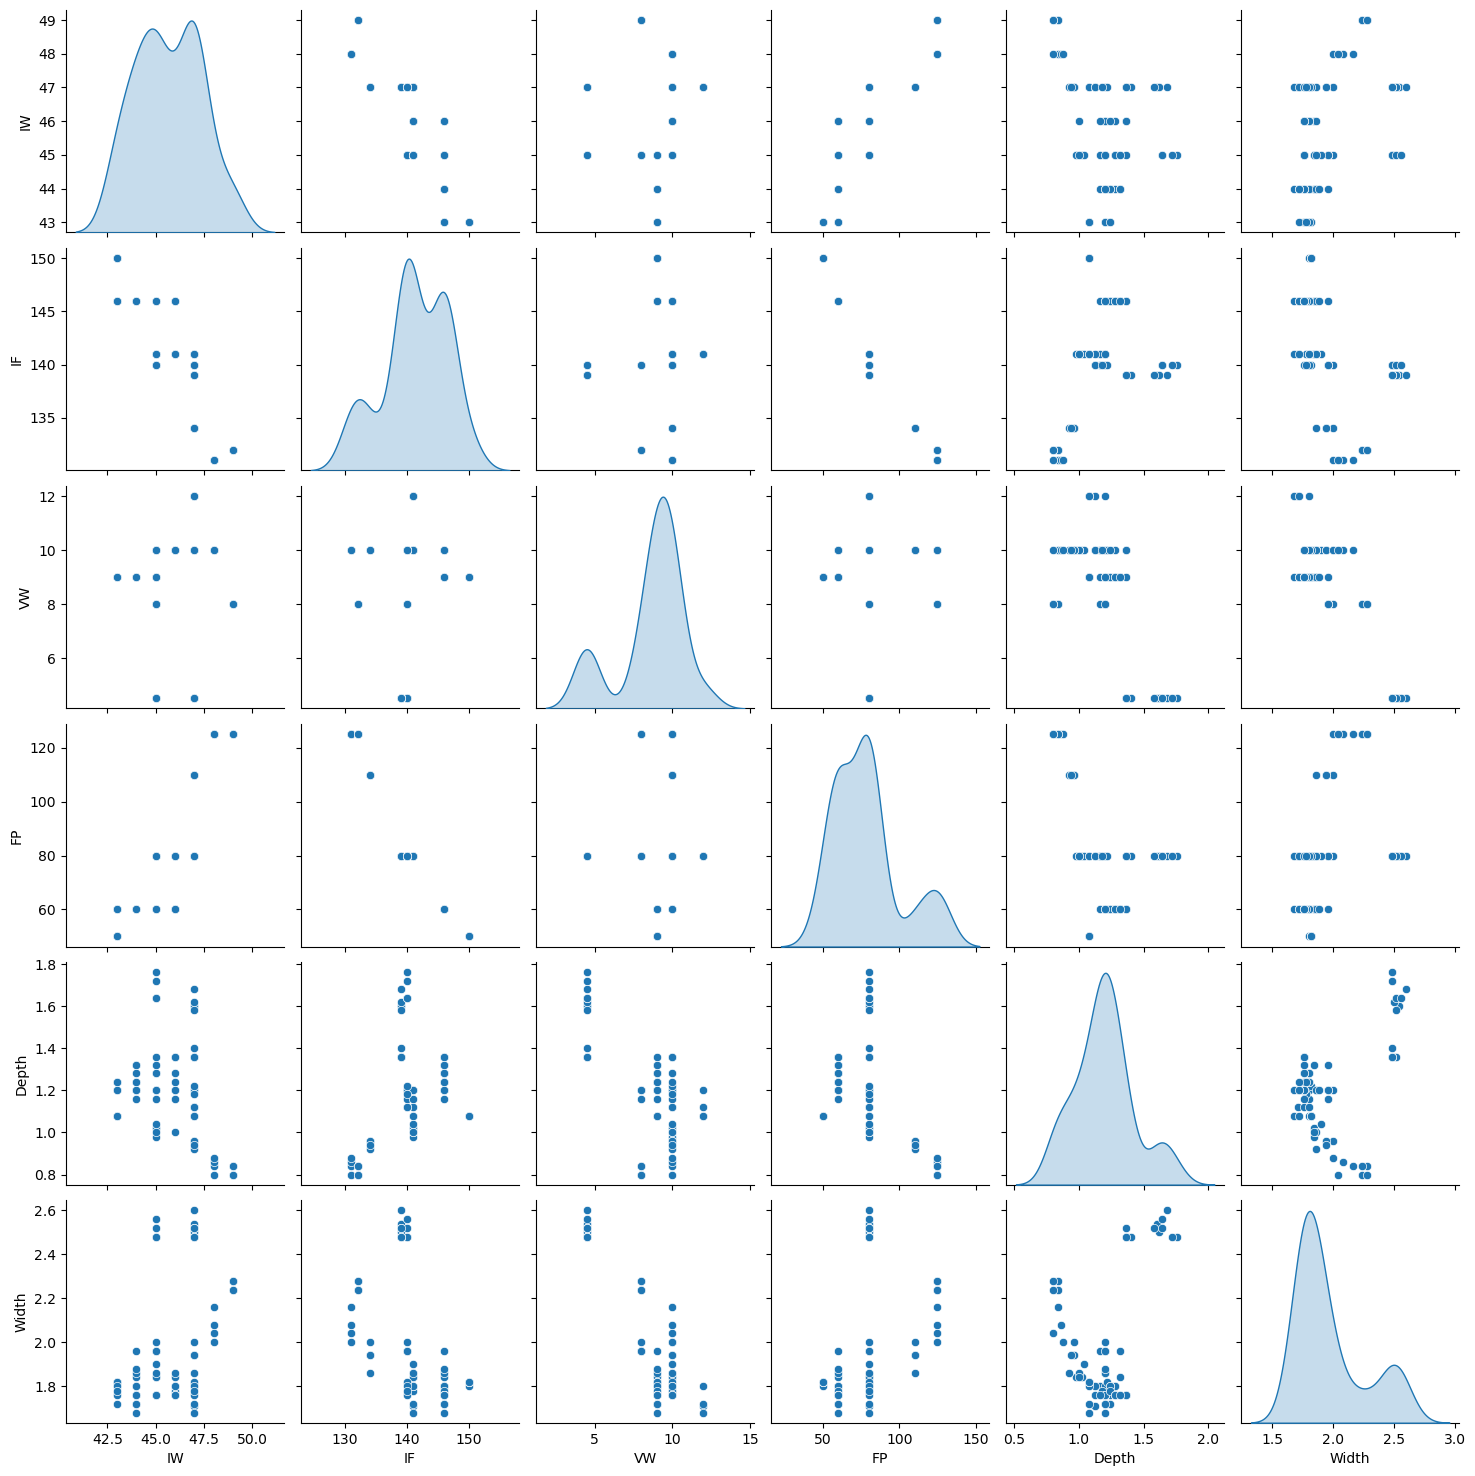

In [7]:
sns.pairplot(df, diag_kind='kde');

Какой либо однозначный вывод о наличии зависимости сделать сложно. Построим матрицу коррелляции.

In [8]:
df.corr()

,IW,IF,VW,FP,Depth,Width
IW,1.000000,-0.861073,-0.043430,0.835530,-0.289568,0.434869
IF,-0.861073,1.000000,0.115093,-0.980562,0.376084,-0.510167
VW,-0.043430,0.115093,1.000000,-0.001060,-0.671437,-0.874257
FP,0.835530,-0.980562,-0.001060,1.000000,-0.510748,0.412962
Depth,-0.289568,0.376084,-0.671437,-0.510748,1.000000,0.425391
Width,0.434869,-0.510167,-0.874257,0.412962,0.425391,1.000000


Видим высокую корреляцию между параметрами IW и FP, FP и IF, а также IW и IF, но так как входных значений мало, оставим всё как есть.

### Разработка модели машинного обучения

#### Обучение нейронной сетью

Для оценки размера сварного шва построим модели отдельно для ширины и глубины.

Разделим выборку на обучающую и тестовую в отношении 80/20 сначала для ширины (Width).

In [9]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y['Width'], test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=1)

Произведем нормализацию полученных данных.

In [10]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [11]:
normalizer.adapt(np.array(X))

In [12]:
print(normalizer.mean.numpy())

[[ 45.666664 141.33334    8.638889  78.33333 ]]


Построим функцию, которая на вход будет принимать нормализованные данные, а на выходе возвращать модель.

In [13]:
def build_and_compile_model(norm):
    model = keras.Sequential([
      norm,
      layers.Dense(128, activation='relu'),
      layers.Dense(128, activation='relu'),
      layers.Dense(1)
    ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
    return model

In [14]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 4)                9         
 n)                                                              
                                                                 
 dense (Dense)               (None, 128)               640       
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17,290
Trainable params: 17,281
Non-trainable params: 9
_________________________________________________________________


In [15]:
def plot_loss(history):
    sns.lineplot(data=history.history['loss'], label='loss') 
    sns.lineplot(data=history.history['val_loss'], label='val_loss')
    plt.ylim([0, 2])
    plt.xlabel('Эпоха')
    plt.ylabel('MAE [MPG]')
    plt.legend()
    plt.grid(True)
    plt.show()

In [16]:
history = dnn_model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    verbose=1, epochs=300)
dnn_model.evaluate(X_test, y_test)

Epoch 1/300
2/2 [==============================] - 1s 157ms/step - loss: 2.0601 - val_loss: 1.8911
Epoch 2/300
2/2 [==============================] - 0s 32ms/step - loss: 1.8575 - val_loss: 1.7199
Epoch 3/300
2/2 [==============================] - 0s 27ms/step - loss: 1.6754 - val_loss: 1.5485
Epoch 4/300
2/2 [==============================] - 0s 27ms/step - loss: 1.4912 - val_loss: 1.3709
Epoch 5/300
2/2 [==============================] - 0s 28ms/step - loss: 1.3012 - val_loss: 1.1906
Epoch 6/300
2/2 [==============================] - 0s 28ms/step - loss: 1.1018 - val_loss: 1.0036
Epoch 7/300
2/2 [==============================] - 0s 29ms/step - loss: 0.8952 - val_loss: 0.8519
Epoch 8/300
2/2 [==============================] - 0s 29ms/step - loss: 0.6929 - val_loss: 0.7534
Epoch 9/300
2/2 [==============================] - 0s 27ms/step - loss: 0.5664 - val_loss: 0.6559
Epoch 10/300
2/2 [==============================] - 0s 26ms/step - loss: 0.4885 - val_loss: 0.5757
Epoch 11/300
2/2 [

0.1350858360528946

Построим график средней абсолютной ошибки (MAE) и оценим эффективность модели.

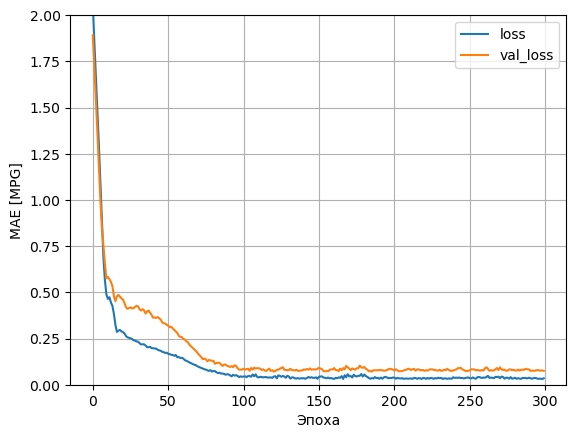

In [17]:
plot_loss(history)

Теперь перейдем к обучению модели для определения значений глубины шва (Depth)

In [18]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y['Depth'], test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=1)

In [19]:
def build_and_compile_model(norm):
    model = keras.Sequential([
      norm,
      layers.Dense(128, activation='relu'),
      layers.Dense(128, activation='relu'),
      layers.Dense(1)
    ])
    model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.001))
    return model

In [20]:
history = dnn_model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    verbose=1, epochs=300)
dnn_model.evaluate(X_test, y_test, verbose=0)

Epoch 1/300
2/2 [==============================] - 0s 58ms/step - loss: 0.7328 - val_loss: 0.7194
Epoch 2/300
2/2 [==============================] - 0s 29ms/step - loss: 0.6503 - val_loss: 0.5679
Epoch 3/300
2/2 [==============================] - 0s 29ms/step - loss: 0.4875 - val_loss: 0.3615
Epoch 4/300
2/2 [==============================] - 0s 27ms/step - loss: 0.2815 - val_loss: 0.2254
Epoch 5/300
2/2 [==============================] - 0s 30ms/step - loss: 0.1958 - val_loss: 0.1833
Epoch 6/300
2/2 [==============================] - 0s 26ms/step - loss: 0.2012 - val_loss: 0.1772
Epoch 7/300
2/2 [==============================] - 0s 27ms/step - loss: 0.2279 - val_loss: 0.1930
Epoch 8/300
2/2 [==============================] - 0s 28ms/step - loss: 0.2568 - val_loss: 0.1861
Epoch 9/300
2/2 [==============================] - 0s 28ms/step - loss: 0.2228 - val_loss: 0.1484
Epoch 10/300
2/2 [==============================] - 0s 28ms/step - loss: 0.1487 - val_loss: 0.1388
Epoch 11/300
2/2 [=

0.16175775229930878

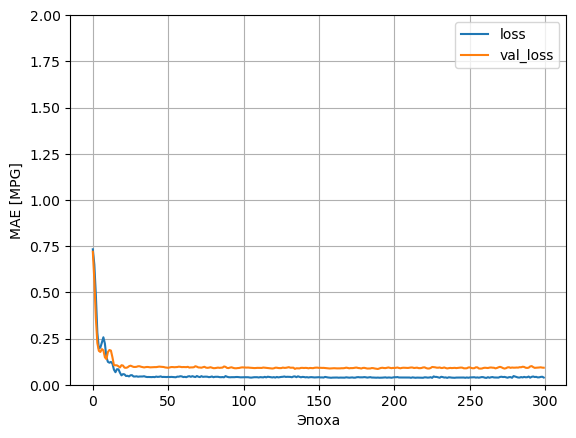

In [21]:
plot_loss(history)

#### Cлучайный лес

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

Разобьем выборку на обучающую и тестовую.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y['Width'], test_size=0.2, random_state=1)

Для подбора гиперпараметров воспользуемся классом GridSearchCV из библиотеки sklearn

In [24]:
random_forest_tuning = RandomForestRegressor(random_state=0)
param_grid = {
   'n_estimators': [100, 200, 500],
   'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth' : [4, 5, 6],
   'criterion' :['squared_error']
}
GSCV = GridSearchCV(estimator=random_forest_tuning, param_grid=param_grid, cv=5, verbose=2)
GSCV.fit(X_train, y_train.values.ravel())
GSCV.best_params_ 

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END criterion=squared_error, max_depth=4, max_features=auto, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, max_depth=4, max_features=auto, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, max_depth=4, max_features=auto, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, max_depth=4, max_features=auto, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, max_depth=4, max_features=auto, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, max_depth=4, max_features=auto, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, max_depth=4, max_features=auto, n_estimators=200; total time=   0.1s
[CV] END criterion=squared_error, max_depth=4, max_features=auto, n_estimators=200; total time=   0.1s
[CV] END criterion=squared_error, max_depth=4, max_features=auto, n_estimators=200; total time=   0.0s
[CV] END cr

{'criterion': 'squared_error',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 200}

In [25]:
rf_width = GSCV.best_estimator_
rf_width

RandomForestRegressor(max_depth=4, n_estimators=200, random_state=0)

Используем гиперпараметры, при которых модель показала себя наилучшим образом.

In [26]:
rf_width = RandomForestRegressor(max_depth=5, n_estimators=100, max_features='auto', random_state=0)

In [27]:
rf_width.fit(X_train, y_train.values.ravel())

RandomForestRegressor(max_depth=5, random_state=0)

In [28]:
test_predictions = rf_width.predict(X_test)

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 2]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [29]:
rf_width.score(X_test, y_test)

0.9671951315707252

In [30]:
rf_width.predict(X_test)

array([1.82268605, 1.78577149, 1.97583   , 1.77712995, 1.78577149,
       1.96052643, 2.23531143, 1.78577149, 2.07358333, 1.78775717,
       1.81303857, 2.50590306, 2.50590306, 1.78775717, 2.07358333])

Теперь обучим модель для поиска глубины шва (параметр Depth)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y['Depth'], test_size=0.2, random_state=1)

In [32]:
random_forest_tuning = RandomForestRegressor(random_state=0)
param_grid = {
   'n_estimators': [100, 200, 500],
   'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth' : [4, 5, 6],
   'criterion' :['squared_error']
}
GSCV = GridSearchCV(estimator=random_forest_tuning, param_grid=param_grid, cv=5, verbose=2)
GSCV.fit(X_train, y_train.values.ravel())
GSCV.best_params_ 

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END criterion=squared_error, max_depth=4, max_features=auto, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, max_depth=4, max_features=auto, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, max_depth=4, max_features=auto, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, max_depth=4, max_features=auto, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, max_depth=4, max_features=auto, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, max_depth=4, max_features=auto, n_estimators=200; total time=   0.1s
[CV] END criterion=squared_error, max_depth=4, max_features=auto, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, max_depth=4, max_features=auto, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, max_depth=4, max_features=auto, n_estimators=200; total time=   0.1s
[CV] END cr

{'criterion': 'squared_error',
 'max_depth': 5,
 'max_features': 'auto',
 'n_estimators': 500}

In [33]:
rf_depth = RandomForestRegressor(max_depth=5, n_estimators=500, max_features='auto', random_state=0)

In [34]:
rf_depth.fit(X_train, y_train.values.ravel())

RandomForestRegressor(max_depth=5, n_estimators=500, random_state=0)

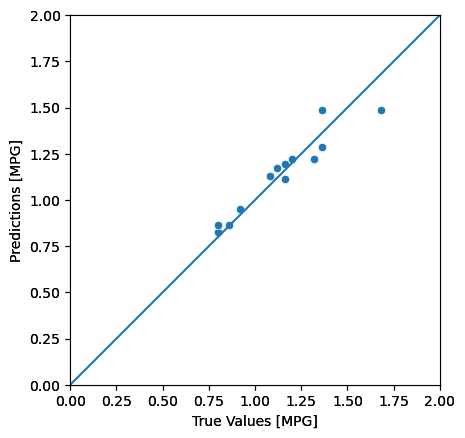

In [35]:
test_predictions = rf_depth.predict(X_test)

a = plt.axes(aspect='equal')
sns.scatterplot(x=y_test, y=test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 2]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
plt.show()

Оценим точность модели.

In [36]:
rf_depth.score(X_test, y_test)

0.889587098911711

In [37]:
rf_depth.predict(X_test)

array([1.11537468, 1.13121655, 1.19452286, 1.28875179, 1.13121655,
       0.95222529, 0.82799262, 1.13121655, 0.86171917, 1.2239502 ,
       1.17028838, 1.48598024, 1.48598024, 1.2239502 , 0.86171917])

#### Метод K-ближайших соседей

In [38]:
from sklearn.neighbors import KNeighborsRegressor

При обучении данным методом, подбор гиперпараметров проведем аналогичным способом, с помощью GridSearchCV

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y['Width'], test_size=0.2, random_state=1)

In [40]:
knn = KNeighborsRegressor()
param_grid = {
   'n_neighbors': [1, 2, 5, 10, 20]
}
GSCV = GridSearchCV(estimator=knn, param_grid=param_grid, cv=10, verbose=2)
GSCV.fit(X_train, y_train)
GSCV.best_params_ 

Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n

{'n_neighbors': 1}

In [41]:
knn.fit(X_train, y_train)
prediction=knn.predict(X_test)
np.mean((y_test - prediction)*(y_test - prediction))

0.006023466666666672

In [42]:
knn.score(X_test, y_test)

0.9120039476418034

Точность этой модели оказалась несколько ниже, чем у обучения методом случайного леса.

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y['Depth'], test_size=0.2, random_state=1)

In [44]:
knn = KNeighborsRegressor()
param_grid = {
   'n_neighbors': [1, 2, 5, 10, 20]
}
GSCV = GridSearchCV(estimator=knn, param_grid=param_grid, cv=10, verbose=2)
GSCV.fit(X_train, y_train)
GSCV.best_params_ 

Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n

{'n_neighbors': 2}

In [45]:
knn.fit(X_train, y_train)
prediction=knn.predict(X_test)
np.mean((y_test - prediction)*(y_test - prediction))

0.008333866666666669

In [46]:
knn.score(X_test, y_test)

0.8424480742085098

При построении модели для определения параметра 'Depth' метод К-ближайших соседей также показал результаты ниже, чем модель случайного леса.

**Вывод:** По результатам сравнения точностей обучения нейронной сетью, методом случайного леса и методом K-ближайших соседей, лучший результат показал метод случайного леса.

### Сохранение модели

In [47]:
import pickle

Сохраняем модель для расчета параметра 'Width'

In [48]:
pickle.dump(rf_width, open('rf_width.pkl', 'wb'))

Проверим, правильно ли сохранилась модель.

In [49]:
model_load_width = pickle.load(open('rf_width.pkl', 'rb'))

In [50]:
model_load_width.predict(X_test)

array([1.82268605, 1.78577149, 1.97583   , 1.77712995, 1.78577149,
       1.96052643, 2.23531143, 1.78577149, 2.07358333, 1.78775717,
       1.81303857, 2.50590306, 2.50590306, 1.78775717, 2.07358333])

Сохраняем модель для расчета параметра 'Depth'

In [51]:
pickle.dump(rf_depth, open('rf_depth.pkl', 'wb'))

In [52]:
model_load_depth = pickle.load(open('rf_depth.pkl', 'rb'))

In [53]:
model_load_depth.predict(X_test)

array([1.11537468, 1.13121655, 1.19452286, 1.28875179, 1.13121655,
       0.95222529, 0.82799262, 1.13121655, 0.86171917, 1.2239502 ,
       1.17028838, 1.48598024, 1.48598024, 1.2239502 , 0.86171917])